# Genetic Algolithm for mAterial (GmAte_ML.py)

Programme to search for stable sequences of inorganic construction.    

Creator：Yumika Yokoyama（Nagoya Institute of Technology・Nakayama lab.）    
Editor: Tsubasa Koyama（Nagoya Institute of Technology・Nakayama lab.）<br>
Edit date: August 10, 2024

## Summary    
This programme uses a genetic algorithm to optimise the ionic sequence at a specified site so that the energy value of the system is low. It can be used, for example, to search for the most stable structure when substituting other elements.    

## detailed explanation    
When evaluating inorganic structures with other-element substitutions, it is important to know which site atoms to substitute. In many cases, the most stable structure will be used, but the number of combinations of sequences is many to the power of 10, and calculating all cases is nearly impossible given the computational cost. In this script, the genetic algorithm (GA), an algorithm to find the optimal solution, can be used to find the most stable structure with a smaller number of searches.     

Figure 1 shows the flow of the genetic algorithm. The genetic algorithm uses genes to carry out optimisation, and to optimise the ionic sequence, the sites are numbered as shown in Fig. 2, and the atoms entering the sites are represented by numbers to represent the genes.      

First, several randomly placed structures are created and their energy values are evaluated. Among them, excellent individuals with low energy are selected as surviving species, and those structures are passed on to the next generation by the following four processes.      
1) Energy stability inherits the upper structure    
2) Two-point crossover creates the gene      
3) Uniform crossover creates the gene     
4) Mutation creates the gene

In addition, in order to solve the problem of convergence taking a long time when there are many GA genes, this program can perform "GAML," which aims to discover the most stable structure in fewer generations by incorporating machine learning into the selection process.
GAML is a six-step process that includes the four steps described above and the following two steps.<br>        
&emsp; 5. Create multiple genes that have undergone crossover and make machine learning predictions.<br>
&emsp; 6. Create multiple genes that have caused mutations and make machine learning predictions.<br>


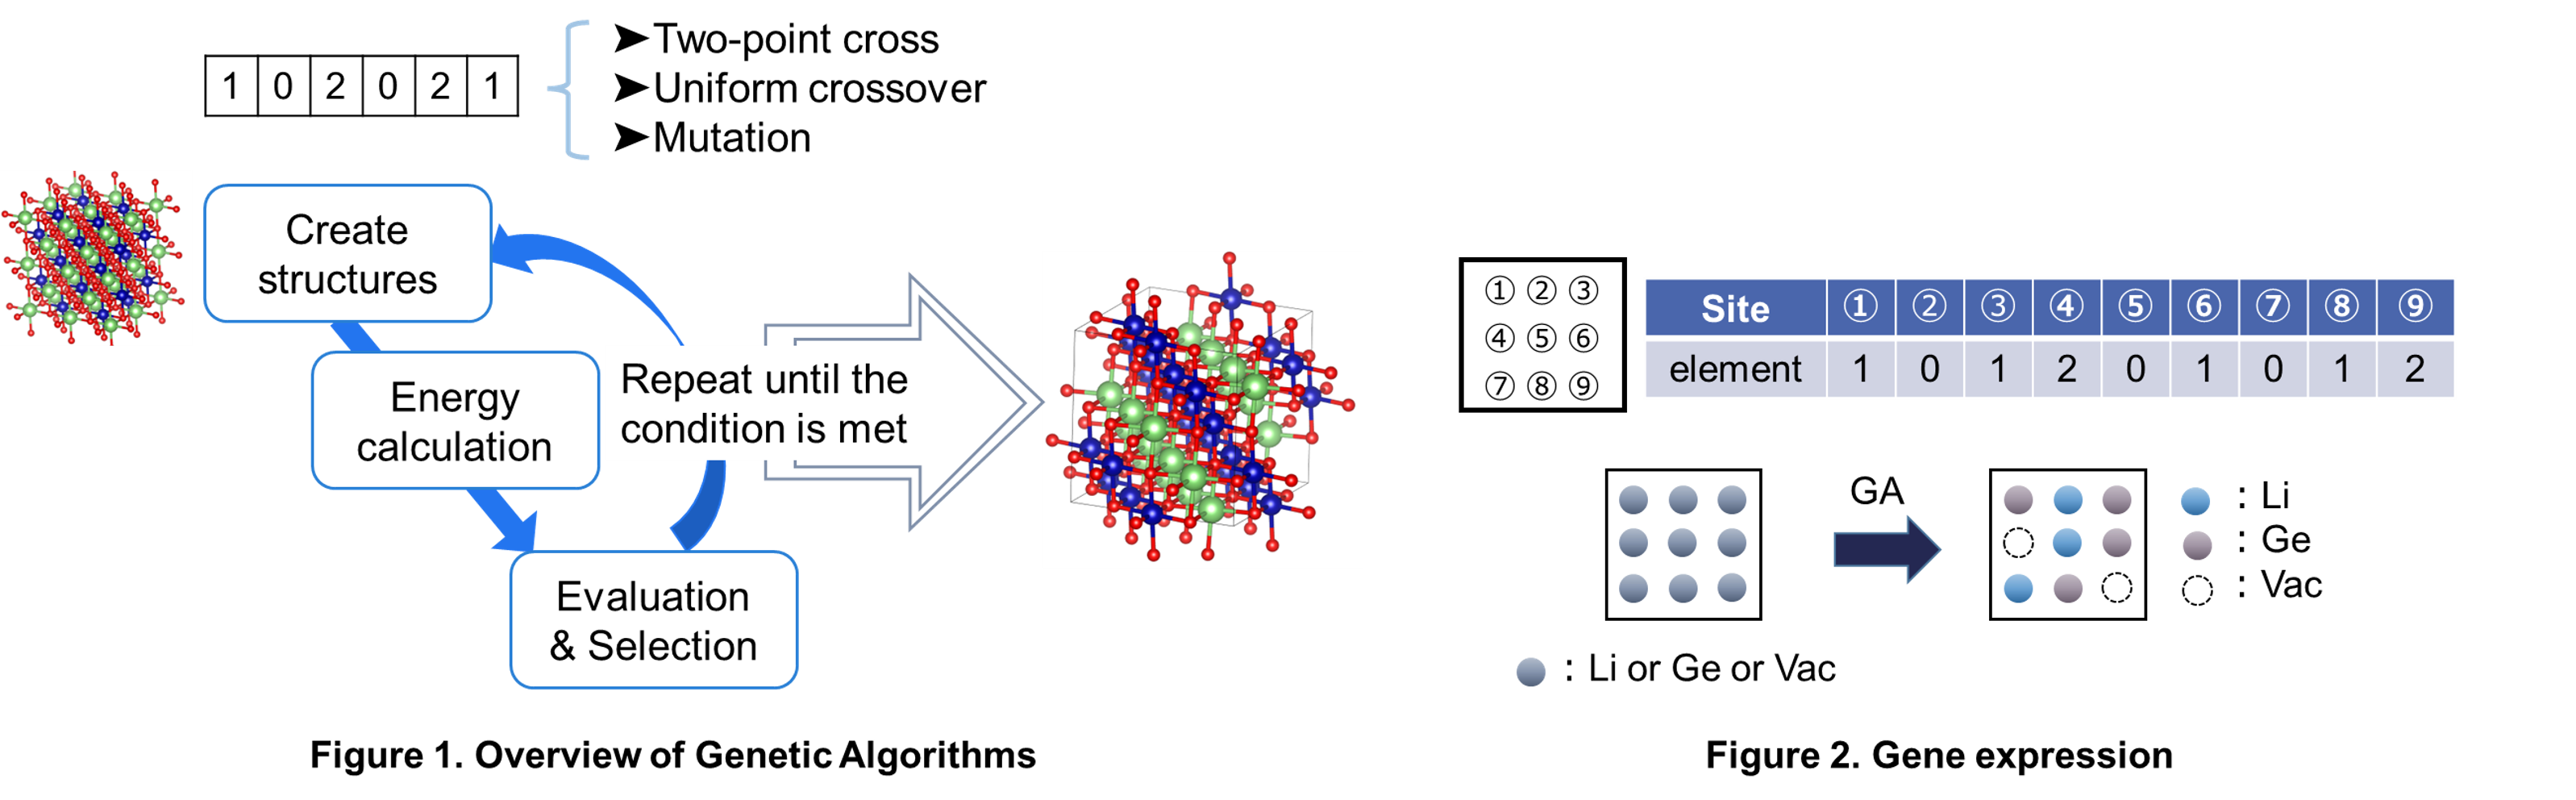

## Usage    
**―Calculation Preparation―**    
1. Create the following file structure     
    * Specific  
        ├POSCAR_org  
        ├calc_energy.py  
        └inp_POSCAR.py    
    * inp_ga.py  
    * inp.params  
    * prepstrings.py 

    * SpccificML (Required only when performing GAML)<br>
        ├make_model.py (Code for creating machine learning models, using Random Forest.)<br>
        └predML.py (Code that makes actual predictions using machine learning models)<br>

2. Creating POSCAR_org    
    Create a regular POSCAR and change the label of the site you want to optimize the array to ELEM1.   
    However, if there are more than two sites to be optimized, label them ELEM2, ELEM3,... and label them as follows.   


3. Edit inp_POSCAR.py    
    <div style="text-align: center;">
    Table1. Parameters of inp_POSCAR.py   
    </div>  
    
    | parametar | example | memo |
    |----|----|----| 
    | runtype | "m3g" | Specifies the calculation method; defines the calculation code corresponding to the runtype within calc_energy.|
    | ions | ["Li", "Co", "O"] | All atoms |
    | ELEM | [["Li", "Co"]] | Atoms to optimize the sequence [[ELEM1 ion], [ELEM2 ion], ...]  |
    | savefiles |  ["POSCAR", "CONTCAR", "temp_gene"] | Specify the file to save |
    | output | "energy" | Specification of the energy file that will be spit out by the calculation. This file is read to obtain the energy value.| 
    | # thread | True | If you want to import an external file and use functions in it to calculate energy, uncomment it. |  
    
    At the same time, change the commands used to calculate the energy values that are set in calc_energy.py.    
    To calculate with M3GNet [1]: Set runtype in inp_POSCAR.py to "m3g" and change runcode="" in calc_energy.py so that the path goes through.    


4. Edit inp_ga.py     
    Set the conditions for the genetic algorithm     
    <div style="text-align: center;">
    Table2. Parameters of inp_ga.py       
    </div>  
    
    | parametar | default | memo |
    |----|----|----| 
    | mlga | True | Set to True for GAML |
    | mlopt1 | 10 | Number of uniform crossings per generation : Number of machine learning predictions POPULATION*SURVIVAL_RATE - mlopt |
    | mlopt2 | 10 | Number of two-point crossings per generation |
    | mlopt3 | 3 | Number of mutations per generation |
    | mlext1 | 200 | Number of candidate genes for two-point crossover when making machine learning predictions |
    | mlext2 | 200 | Number of candidate genes for uniform crossover when making machine learning predictions |
    | mlext3 | 200 | Number of candidate genes for mutations when making machine learning predictions |
    | outMLpred | "sort_label.out" | File name with genes sorted in order of decreasing energy |
    | outMLreg | "test_rmse.out" | Name of the file containing the RMSE after machine learning prediction |
    | dirML | "MLrun" | Directory name to store data obtained from machine learning predictions |
    | POPULATION | 24 | Number of individuals per generation |
    | NUM_OF_STRINGS | 1 | Number of genes to optimize |
    | MAX_GENERATION | 300 | Maximum number of generations |
    | SAVE | 3 | Number of best individuals to pass on to the next generation |
    | SURIVAL_RATE | 0.6 | Number of individuals who will be passed on as parents to the next generation |
    | CR_2PT_RATE | 0.4 | Percentage of 2-point crossing|
    | CR_UNI_RATE | 0.4 | Percentage of uniform crossover |
    | CR_UNI_PB | 0.5 | Probability of uniform crossover |
    | MUTATION_PB | 0.02 | Probability of mutation |
    | STOP_CRITERIA | 100 | Stop Condition |
    | # RESTART |True | Uncomment out if you want to re-throw the calculation from the continuation. |
    | ELEMENT_FIX | True | True if you want to fix the number of each element. |
    | temp_gene | "temp_gene" | Name of the file containing the gene |
    | eval_file | "energy" | Name of file from which to read energy values |
    | ncore | 8 | Number of mitigation calculations to be performed in parallel |
  
  
5. Create inp.params       
    File to create the initial gene. Used to read how many of which elements are present.    
    1) Edit prepstrnigs.py  
        0, 1, 2... Gene numbers correspond to the order set in ELEM in inp_POSCAR.py  
    2) Edit prepstrings.py  
        inp.parmas is created.  

**―How to throw a calculation―**  
* GmAte_ML.py -ga  
    Sequence optimization begins.     
&nbsp;  
* GmAte_ML.py -bestgene out.value_indiv 1 5  
    Extract the top 1 to 5 and create a directory for each.      
&nbsp;  
* calc_energy.py -gene2pos   
    When run in the directory where temp_gene, POSCA_org, and inp_POSCAR.py are located, POSCAR is created by reading the genes in temp_gene.
    Gene sequences are saved in Save_info and out.value_indiv.
  
&nbsp;      
## Selection Methods for Surviving Individuals
GmAte_ML.py Around line 771, you can specify how to select surviving individuals.   
select_mode = "ranking"  

* Ranking Selection (RANKING)
    Selection method similar to gstring. Sort in order of energy stability, with the top individuals as survivors.
* Tournament Selection (tournament)  
    Tournament games shall be played and the winner shall be the surviving individual.
* Roulette Selection (roulett)  
    Surviving individuals are selected by turning a roulette wheel, weighted in order of excellence. The better individuals are weighted so that they are more likely to be selected by the roulette. 
      
&nbsp;      
## About Example    
* LSCF_M3GNet  
    Optimized (La, Sr) and (Co, Fe) sites in La38Sr26Co13Fe51O192 
    Calculations are performed by M3GNet by invoking m3g.py in calc_energy.py.
    ※Currently, m3g.py is not on Github.  
    The numbers of La, Sr, Co, and Fe are fixed.
&nbsp;      
* LSCF_nofix_M3GNet  
    Optimized (La, Sr) and (Co, Fe) sites in (La, Sr)64(Co, Fe)64O192  
    The calculations are performed using m3gnet.
    The ratios of (La, Sr), (Co, Fe) are not fixed. 
&nbsp;
* LiAlO2_import_M3GNet
    Optimized cationic sites in LiAlO2
    Specific/optm3g.py is used to perform calculations with M3GNet.
    The calculation is faster because the import only needs to be done once. 
&nbsp;
* LiCoO2_M3GNet
    Optimized cation sites in LiCoO2
    GAML is used to create models and introduce genes with machine learning predictions using Random Forest.

## Licensing / Citation
**Citation**  
[1] Chen, C., Ong, S.P. A universal graph deep learning interatomic potential for the periodic table. Nat Comput Sci 2, 718–728 (2022). https://doi.org/10.1038/s43588-022-00349-3.

## Funding
Grant-in-Aid for Scientific Research 19H05815, 20H02436